In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.layers import Input,Dense,Dropout,Flatten
from keras.models import Model

import multiprocessing


Generate some data for a regression problem

In [2]:
from math import *
# Fixing random state for reproducibility
np.random.seed(123)

#FILL ME: put some function in place of this one
theFunction = lambda x1,x2,x3,x4,x5 : (np.sin(x1*10)+x2**x3)*x4

N=800
x1 = 1.0 * np.random.rand(N)
x2 = 1.0 * np.random.rand(N)
x3 = 1.0 * np.random.rand(N)
x4 = 1.0 * np.random.rand(N)
x5 = 1.0 * np.random.rand(N)
y=theFunction(x1,x2,x3,x4,x5)

X=np.stack((x1,x2,x3,x4,x5), axis=1)

print(X[:10,:])
print(y[:10])


[[0.69646919 0.3871952  0.4732499  0.65353053 0.29974806]
 [0.28613933 0.55585958 0.12527156 0.97839806 0.75045588]
 [0.22685145 0.01414381 0.07528317 0.32387778 0.29155519]
 [0.55131477 0.847647   0.66483846 0.13137077 0.51634825]
 [0.71946897 0.92191986 0.83790816 0.17253149 0.48778668]
 [0.42310646 0.55052969 0.92409405 0.03216338 0.04743733]
 [0.9807642  0.26802112 0.38818585 0.82387829 0.57038305]
 [0.68482974 0.990239   0.93831583 0.07615528 0.5049035 ]
 [0.4809319  0.38319403 0.81980347 0.89366009 0.51916279]
 [0.39211752 0.69365539 0.42404167 0.04843728 0.0318487 ]]
[ 0.8288136   1.17957967  0.48323524  0.02624378  0.2975435  -0.00998148
  0.18639801  0.11623952 -0.48240599  0.00742746]


Draw the data points

NameError: name 'iris' is not defined

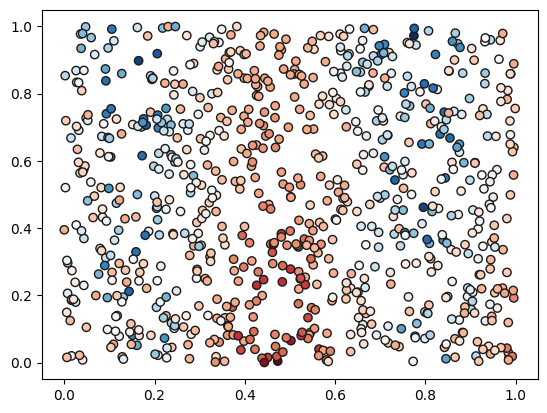

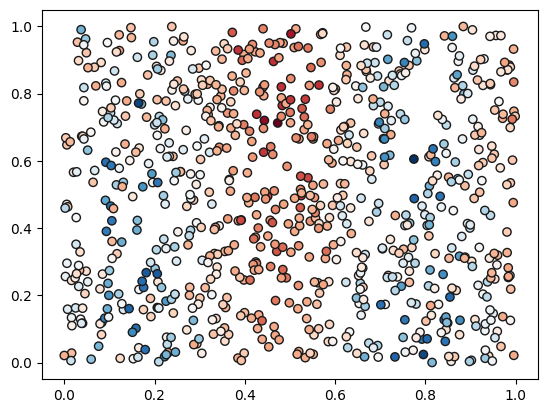

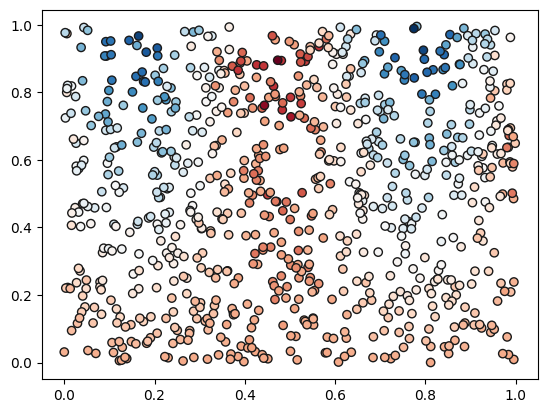

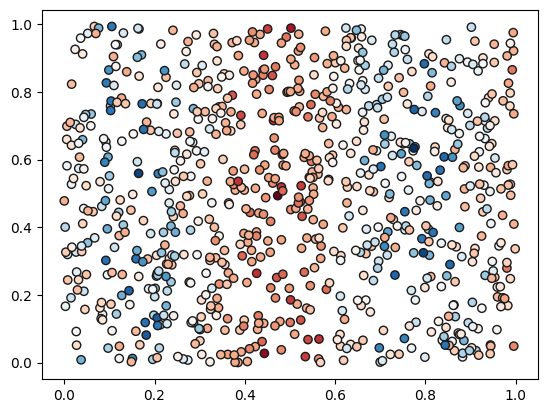

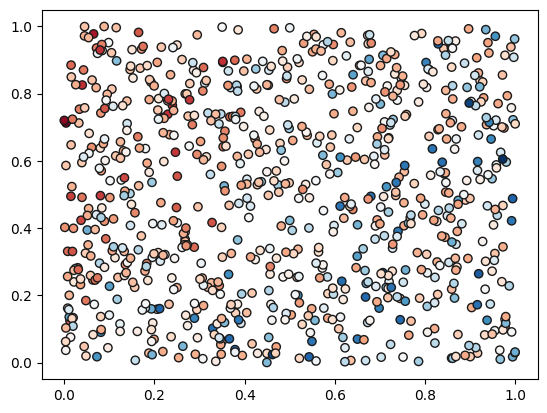

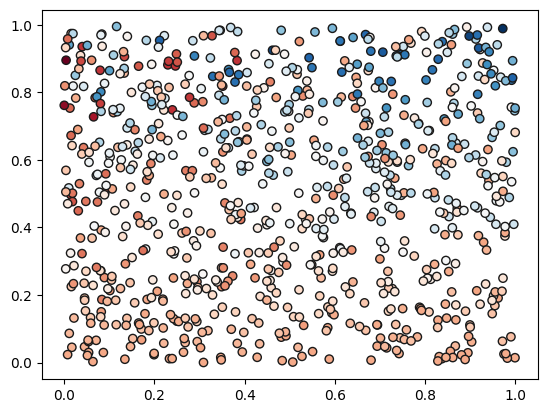

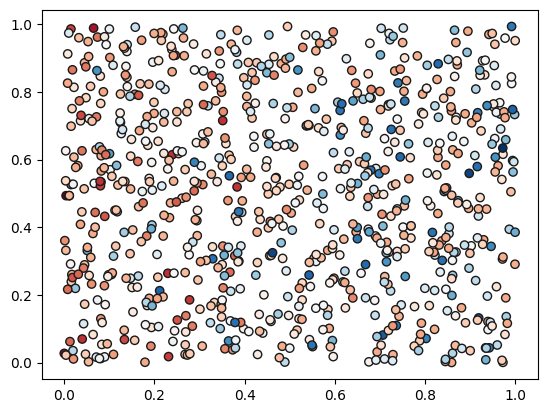

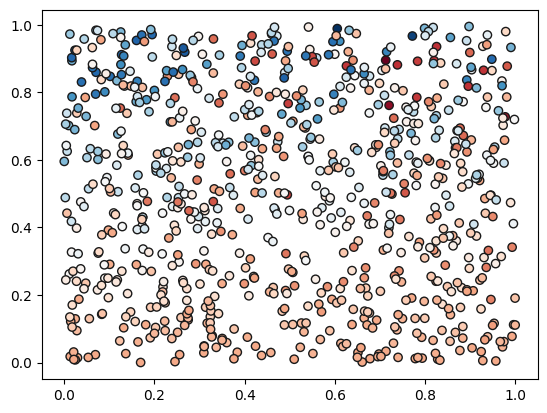

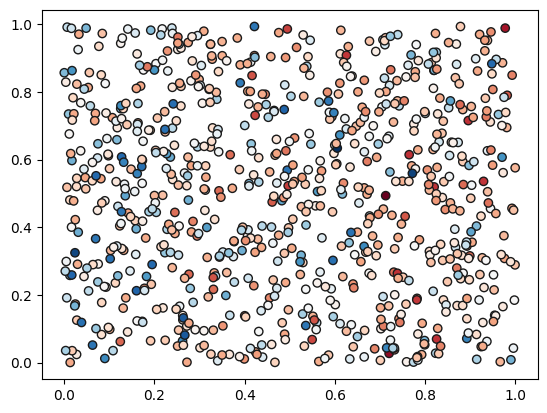

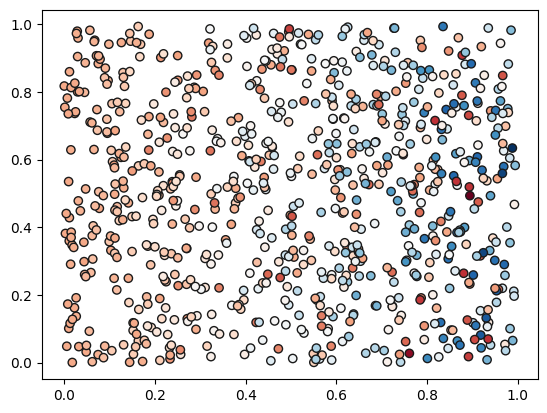

In [3]:
for i in range(5) :
  for j in range(i+1,5) :
 #   print(i,j)
    plt.figure()
    plt.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.RdBu, edgecolors='k')


import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [4]:

inputs=Input(shape=(5,))
hidden=Dense(500, activation='relu')(inputs)
outputs = Dense(1)(hidden) #FILL THE DOTS#  which activation? No activation is simply linear
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='MSE', optimizer='adam') #FILL THE DOTS# which  loss ?

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,501 (13.68 KB)

 Trainable params: 3,501 (13.68 KB)

 Non-trainable params: 0 (0.00 B)

Split the dataset in training+validation and test, then fit




[[0.69646919 0.3871952  0.4732499  0.65353053 0.29974806]
 [0.28613933 0.55585958 0.12527156 0.97839806 0.75045588]
 [0.22685145 0.01414381 0.07528317 0.32387778 0.29155519]
 [0.55131477 0.847647   0.66483846 0.13137077 0.51634825]
 [0.71946897 0.92191986 0.83790816 0.17253149 0.48778668]
 [0.42310646 0.55052969 0.92409405 0.03216338 0.04743733]
 [0.9807642  0.26802112 0.38818585 0.82387829 0.57038305]
 [0.68482974 0.990239   0.93831583 0.07615528 0.5049035 ]
 [0.4809319  0.38319403 0.81980347 0.89366009 0.51916279]
 [0.39211752 0.69365539 0.42404167 0.04843728 0.0318487 ]]
[ 0.8288136   1.17957967  0.48323524  0.02624378  0.2975435  -0.00998148
  0.18639801  0.11623952 -0.48240599  0.00742746]
[[0.4562706  0.81945562 0.42301597 0.5033595  0.32617792]
 [0.27980202 0.50550295 0.3930183  0.87270065 0.39149535]
 [0.93289165 0.96543106 0.03670115 0.47542162 0.76797575]
 [0.31435135 0.658089   0.88401959 0.77206645 0.26432289]
 [0.90971466 0.5932379  0.67648011 0.14644843 0.94971801]
 [0.04

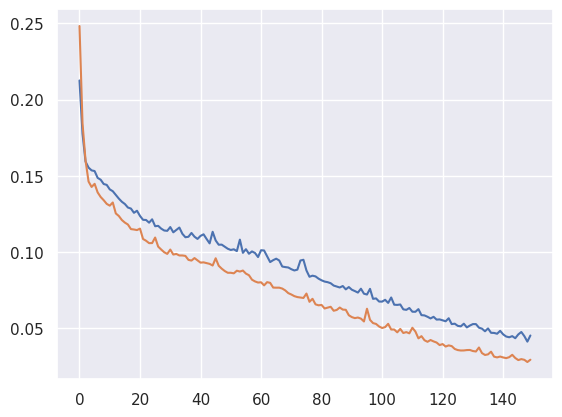

In [6]:
#This time we split the X,y upfront
nsplit=int(N/2)

#FILL ME# slice X and y in half and assign them to X_tr, X_val, y_tr, y_val
X_tr=X[:nsplit,:]
X_val=X[nsplit:,:]
y_tr=y[:nsplit]
y_val=y[nsplit:]
#NB: you can use scikit learn to shuffle, coherently X and y, and split , see sklearn.model_selection.train_test_split

#check that the splitting makes sense
print(X_tr[:10])
print(y_tr[:10])
print(X_val[:10])
print(y_val[:10])

history=model.fit(X_tr,y_tr,validation_data=(X_val,y_val),epochs=150,verbose=0) #FILL THE DOTS# What should we put in place of X and y as "training" datasets?

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(400,) (400, 1)
[0.07106245] -0.035032576023517586 0.10609502911466215


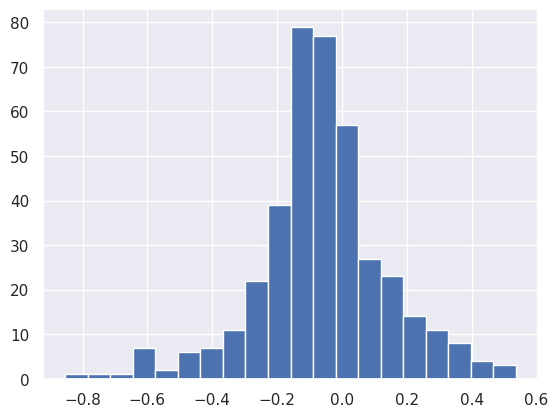

In [10]:
y_pred_val=model.predict(X_val)

#mind the shape of the prediction....
print(y_val.shape,y_pred_val.shape)

residuals=y_pred_val[:,0] - y_val #FILL ME# we want to define residual, sample by sample as (prediction - truth)... from each y_pred_val subtract what?

print(y_pred_val[0],y_val[0],residuals[0])
plt.hist(residuals, 20)
plt.show()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,426 (13.38 KB)

 Trainable params: 3,426 (13.38 KB)

 Non-trainable params: 0 (0.00 B)

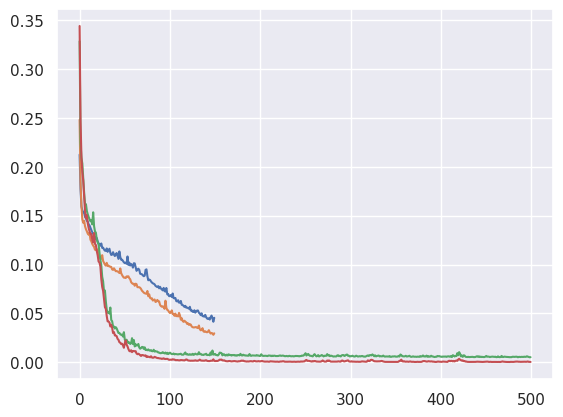

In [12]:

#FILL ME# create a deep model for regression
#....
#....
#....
#...
inputs=Input(shape=(5,))
hidden=Dense(25, activation='relu')(inputs)
hidden=Dense(25, activation='relu')(hidden)
hidden=Dense(25, activation='relu')(hidden)
hidden=Dense(25, activation='relu')(hidden)
hidden=Dense(25, activation='relu')(hidden)

hidden=Dense(25, activation='relu')(hidden)
outputs = Dense(1)(hidden)
deepmodel=Model(inputs=inputs,outputs=outputs)
deepmodel.compile("adam","MSE")
deepmodel.summary()
deephistory=deepmodel.fit(X_tr,y_tr,validation_data=(X_val,y_val),epochs=500,verbose=0)

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.plot(deephistory.history["val_loss"])
plt.plot(deephistory.history["loss"])
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


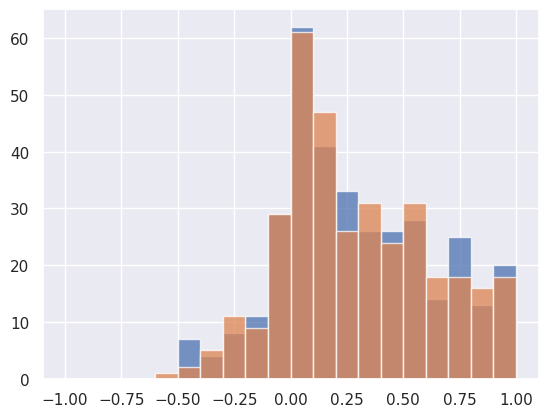

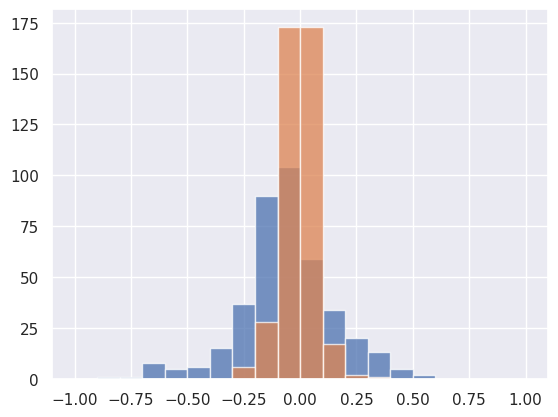

In [13]:
y_pred_val_deep=deepmodel.predict(X_val)
residuals_deep=np.subtract(y_pred_val_deep[:,0],y_val)
plt.hist(y_val, 20,range=[-1,1],alpha=0.75)
plt.hist(y_pred_val_deep, 20,range=[-1,1],alpha=0.75)
plt.show()
plt.hist(residuals, 20,range=[-1,1],alpha=0.75)
plt.hist(residuals_deep, 20,range=[-1,1],alpha=0.75)
plt.show()